##### [< Forrige](8%20-%20sympy.ipynb)     |     <span style="color:lightgrey">Neste></span>

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 9 - Simuleringer </span>  

### Simulering – Kombinasjon av "alt" 🧠

Simulering er et kraftig verktøy fordi det kombinerer nesten **alle konseptene** vi har dekket i kurset til nå.

**Hvorfor simulering er viktig:**

* **Variabler, Funksjoner & Lister/Dictionaries:** Brukes til å definere input, lagre data og bygge de logiske stegene i modellen (f.eks. rente, startkapital, priser).
* **Løkker (`for`/`while`):** Løkker er selve *kjernen* i simulering, da de repeterer prosessen tusenvis av ganger.
* **NumPy:** Essensielt for å håndtere tilfeldigheter (`np.random`) og for raske, **vektoriserte** beregninger på store datamengder.
* **Pandas:** Nødvendig for å organisere, strukturere og analysere de tusenvis av simuleringsresultatene på en effektiv måte.
* **Matplotlib:** Brukes for å visualisere resultatene (f.eks. som et histogram) og si noe om modellen vår. Ved å visualisere data, får vi ofte bedre innsikt i hva som faktisk foregår.

Simulering tvinger deg til å **integrere** disse verktøyene for å løse realistiske økonomiske problemer, som omhandler tema som usikkerhet og risiko.

# **Introduksjon til simulering**
Løkker er grunnsteinen i simulering. En simulering er en metode for å etterligne den virkelige verden ved å repetere en prosess mange ganger. Dette lar oss estimere usikre utfall, spesielt i finans og økonomi.

Vi starter med å repetere for-løkken, ettersom den brukes til å repetere en handling et fast antall ganger.

## Eksempel 1: Rentes rente – Kraften i repetisjon
Et sentralt økonomisk konsept er renters rente. Vi bruker en enkel `for`-løkke til å spore veksten i en investering over tid.

In [1]:
# 1. Startparametere
startkapital = 10000  # Startbeløp i kroner
årlig_rente = 0.05   # 5% årlig rente
antall_år = 10

# Variabel for å holde styr på kapitalen
kapital = startkapital

print(f"Kapital ved start (År 0): {kapital:,.2f} kr")

# 2. Bruk en for-løkke til å simulere veksten år for år
for i in range(1, antall_år + 1):
    # Oppdater kapitalen: Kapital = Gammel_Kapital * (1 + Rente)
    kapital = kapital * (1 + årlig_rente)
    print(f"Kapital ved slutten av år {i}: {kapital:,.2f} kr")

Kapital ved start (År 0): 10,000.00 kr
Kapital ved slutten av år 1: 10,500.00 kr
Kapital ved slutten av år 2: 11,025.00 kr
Kapital ved slutten av år 3: 11,576.25 kr
Kapital ved slutten av år 4: 12,155.06 kr
Kapital ved slutten av år 5: 12,762.82 kr
Kapital ved slutten av år 6: 13,400.96 kr
Kapital ved slutten av år 7: 14,071.00 kr
Kapital ved slutten av år 8: 14,774.55 kr
Kapital ved slutten av år 9: 15,513.28 kr
Kapital ved slutten av år 10: 16,288.95 kr


# **Eksempel 2: Iterativ Modellering - Aksjekursen (Random Walk)**
Vi skal nå bygge en enkel simulering av en aksjekurs ved hjelp av konseptet Random Walk (*tilfeldig gange* på dårlig oversatt norsk), der prisen i morgen er avhengig av prisen i dag pluss en tilfeldig endring.

Dette viser hvordan en simulering bygges steg for steg (iterativt).

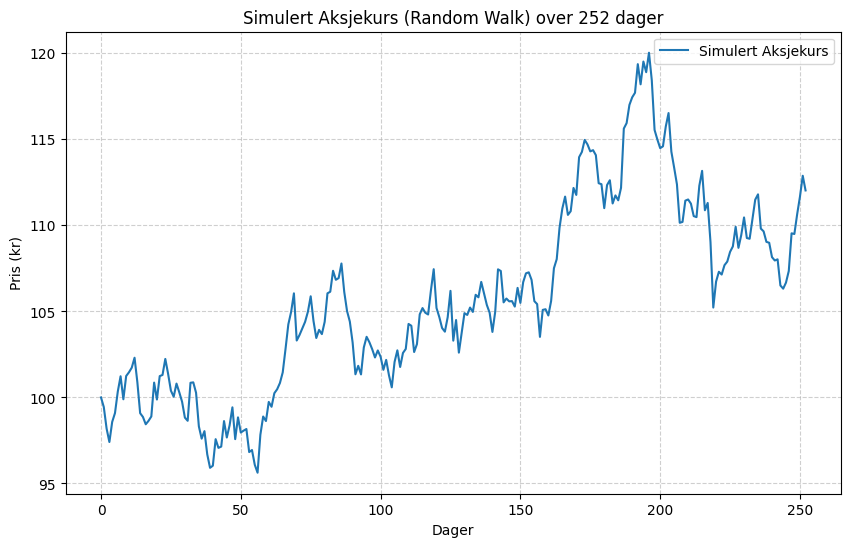

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Startparametere
start_pris = 100
antall_dager = 252 # Antall handelsdager i et år
daglig_volatilitet = 0.01 # Standardavvik for daglig endring (1%)

# Lister for å lagre resultatene
prisutvikling = [start_pris]
dager = [0]

# 2. Simuler prisutviklingen
for i in range(1, antall_dager + 1):
    # Generer en tilfeldig daglig endring (normalfordeling er ofte brukt) - mean=0, std=daglig_volatilitet
    endring = np.random.normal(loc=0, scale=daglig_volatilitet)
    
    # Ny pris = Gammel pris * (1 + Endring)
    ny_pris = prisutvikling[-1] * (1 + endring)
    
    # Lagre dataen
    prisutvikling.append(ny_pris)
    dager.append(i)

# 3. Visualiser resultatet
plt.figure(figsize=(10, 6))
plt.plot(dager, prisutvikling, label='Simulert Aksjekurs')
plt.title(f"Simulert Aksjekurs (Random Walk) over {antall_dager} dager")
plt.xlabel("Dager")
plt.ylabel("Pris (kr)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Plottet over vil vise forskjellig utfall for hver gang du kjører cellen. Det er fordi prisen avhenger av tidligere pris, med en tilfeldig komponent!

# Eksempel 3: While-løkke for simulering av aksjekurs

En `while`-løkke er en løkke som fortsetter inntil en betingelse er oppfylt. I eksempelet under ser vi at det genereres nye tilfeldige aksjekurser så lenge kursen er under 125 kroner . 

Aksjen skal bevege seg tilfeldig. For å få til det bruker vi funksjonen `rand` fra `random`-modulen i numpy.  `np.random.rand()` gir et tilfeldig tall mellom null og én, så ved å multiplisere `(np.random.rand()-0.5)` med 40, får vi et tilfeldig tall mellom -20 og 20. 

#### Eksempel 3:

In [3]:
import numpy as np

dy = 0
y = 100

while y < 125:  
    y += dy
    dy = 40*(np.random.rand()-0.5) 
    print(y)

100
116.74560057583646
96.9516069361915
89.99400343779685
86.70327403956992
95.25378492749317
115.17072793532644
110.03382847220543
121.55004995180886
135.10220334609906


Legg spesielt merke til `y+=dy` over. Denne operasjonen legger `dy` til `y`, og tilsvarer altså `y=y+dy`. De aller fleste programmeringsspråk støtter `+=`-operatoren.  

Legg også merke til at vi kan sette flere variabler samtidig, ved å skille både variablene og verdiene med like mange kommaer, `dy,y=0,100`

# Kraften av simulering 📊 📈 📉

Simuleringer brukes i økonomi for å modellere usikkerhet, teste hypoteser og analysere sannsynlige utfall.  
I denne notatboken skal vi utforske hvordan vi kan bruke Python til å simulere økonomiske problemstillinger ved hjelp av tilfeldige tall og statistiske teknikker.

Vi vil se på:
- Generering av tilfeldige tall
- Monte Carlo-simuleringer
- Simulering av økonomiske prosesser, som prisutvikling og risikoanalyse

Løkker kan brukes til mye, så la oss se på et eksempel på simulering. 

Simulering vil si å trekke tilfeldige tall for å se hvordan en modell opptrer under usikkerhet. 
## Simulering av aksjekurs 💹

I denne simuleringen antar vi at en aksjekurs starter på 100 kr og beveger seg tilfeldig over tid.  
Vi observerer aksjen hvert sjette minutt, eller én tidel (0.1) av en time. Tiden øker dermed med 0.1 i hver periode. 

For å tegne opp stien til aksjekursen, lager vi først lister for x- og y-verdiene, og så legger vi til elementer i hver av listene med `append`-funksjonen til listeobjektene, før listen plottes som en graf. Kjør koden flere ganger, for å se ulike simuleringer. 

#### Eksempel 4:

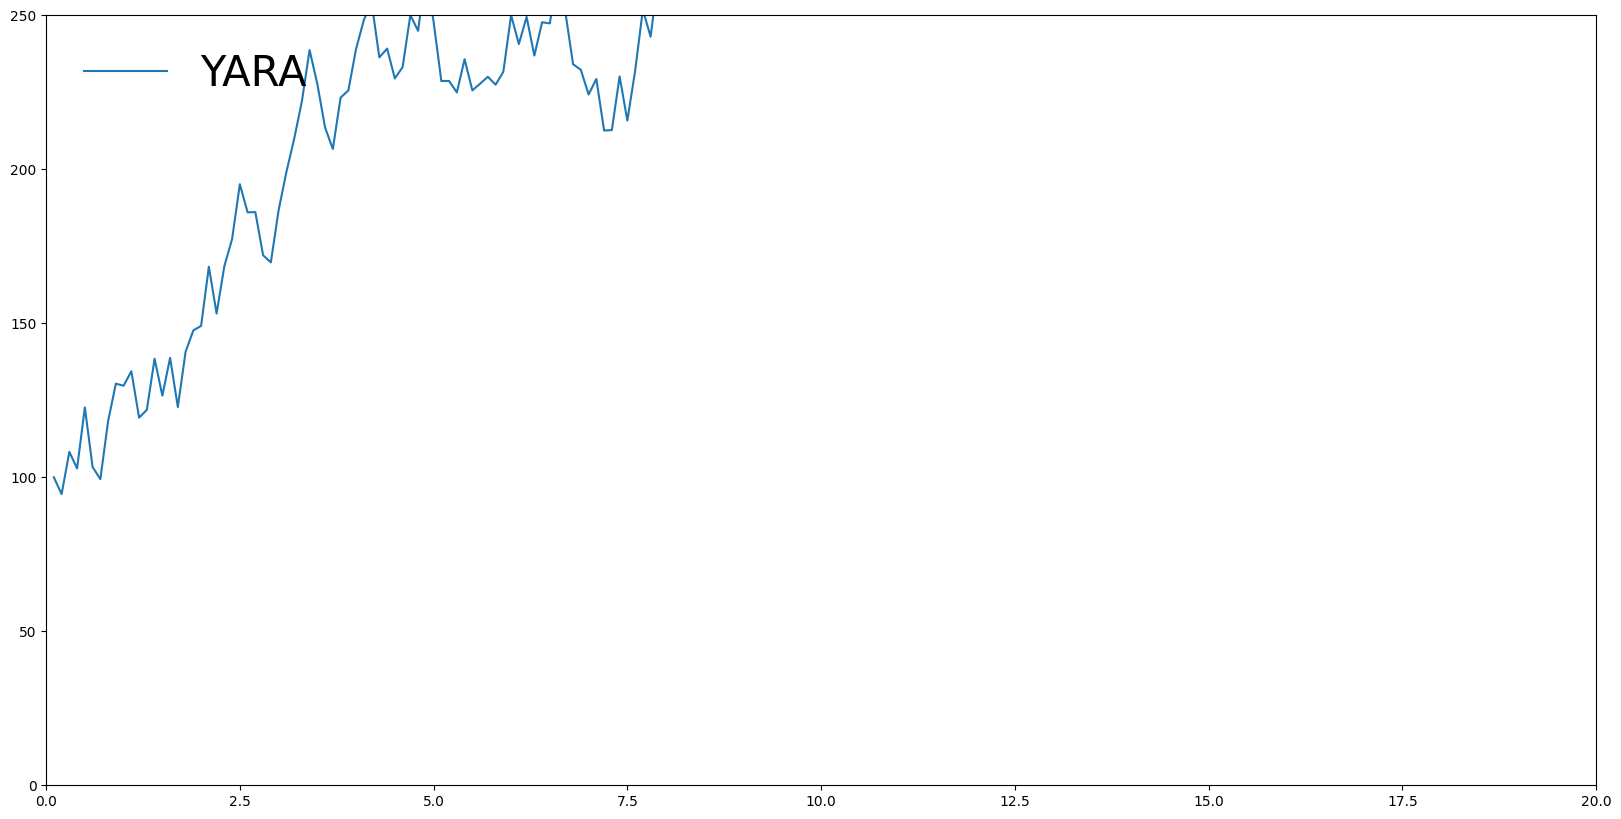

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
from IPython.display import display, clear_output

# Oppretter en figur og akse med en størrelse på 20x10 tommer
fig, ax = plt.subplots(figsize=(20, 10))

# Setter begrensninger for y- og x-aksen
ax.set_ylim([0,250])            # Y-aksen går fra 0 til 250
ax.set_xlim([0,20])             # X-aksen går fra 0 til 20

# Initierer med en rekke verdier (x = 0, y = 100, dy = 0)
x, y, dy = 0, 100, 0

# Lager tomme lister som vil lagre x- og y-posisjoner gjennom løkka
ypath = []
xpath = []

# While-løkka kjører så lenge x < 25, og for hvert steg økes x med 0.1
while x < 25:
    x += 0.1            # Øker x med 0.1 for hvert steg
    y += dy             # Legger til dy til y-posisjonen (endrer y basert på dy)
    
    # Oppdaterer dy med en ny tilfeldig verdi som varierer mellom -20 og 20.
    # np.random.rand() gir en tilfeldig verdi mellom 0 og 1, 
    # så 40 * (np.random.rand() - 0.5) gir et tilfeldig tall mellom -20 og 20.
    # Dette gir y-posisjonen en tilfeldig variasjon ved hvert steg.
    dy = 40 * (np.random.rand() - 0.5)

    # Legger til de nye x- og y-verdiene i listene xpath og ypath
    xpath.append(x)
    ypath.append(y)

# Plotter banen for y-verdiene som funksjon av x, med etiketten 'YARA' (eksempel på et selskap)
ax.plot(xpath, ypath, label='YARA')

# Legger til en legende (forklaring) øverst til venstre på plottet
ax.legend(loc='upper left', frameon=False, fontsize=30)

# Viser plottet
plt.show()

## Simulering av stokastisk/tilfeldig bevegelse - forklaring av koden fra eksempel 4 

Denne koden simulerer en tilfeldig bevegelse over tid, som kan brukes til å modellere aksjekurser eller andre økonomiske prosesser med usikkerhet.  

### 🔹 Hvordan fungerer simuleringen?  
- Vi starter med en initial verdi **y = 100** og en tilfeldig endring **dy**.
- Hver iterasjon øker **x** med **0.1**, og **y** justeres med en tilfeldig verdi.
- **dy** oppdateres tilfeldig mellom **-20 og 20**, slik at vi får en tilfeldig variasjon i y-posisjonen.
- Bevegelsen plottes som en kurve, og resultatet viser hvordan verdien utvikler seg over tid.

### 🔹 Forklaring av kode:
- **`ax.set_ylim([0,250])`** og **`ax.set_xlim([0,20])`** setter grensene for x- og y-aksen.
- **`while x < 25:`** sørger for at simuleringen kjører til x når 25.
- **`dy = 40 * (np.random.rand() - 0.5)`** genererer en tilfeldig endring mellom -20 og 20.
- **`ax.plot(xpath, ypath, label='YARA')`** tegner banen for den simulerte bevegelsen.

Kjør koden flere ganger for å se hvordan den tilfeldige bevegelsen varierer!

# Dynamisk plott 📉

Om vi ønsker å formidle kunnskap, er det av og til nyttig med dynamiske plott. Altså plott som endrer seg mens du ser på dem. Vi kan gjøre det ved å rykke inn de to siste setningene fra Eksempel 4. 

Det er disse setningene som lager plottet. Ved å rykke dem inn, plottes figuren i hver iterasjon. 

### 🔹 Viktig å merke seg:
- Uten **`clear_output(wait=True)`**, ville vi sett **25 separate figurer** i stedet for én dynamisk oppdatering. 
- I tillegg, så legger vi til at y-verdien ikke kan bli mindre enn $0$. Det gjør vi her **`while x < 25 and y >=0`**.

Kjør koden i Eksempel 5 og se hvordan den simulerte bevegelsen utvikler seg i sanntid! 

#### Eksempel 5:

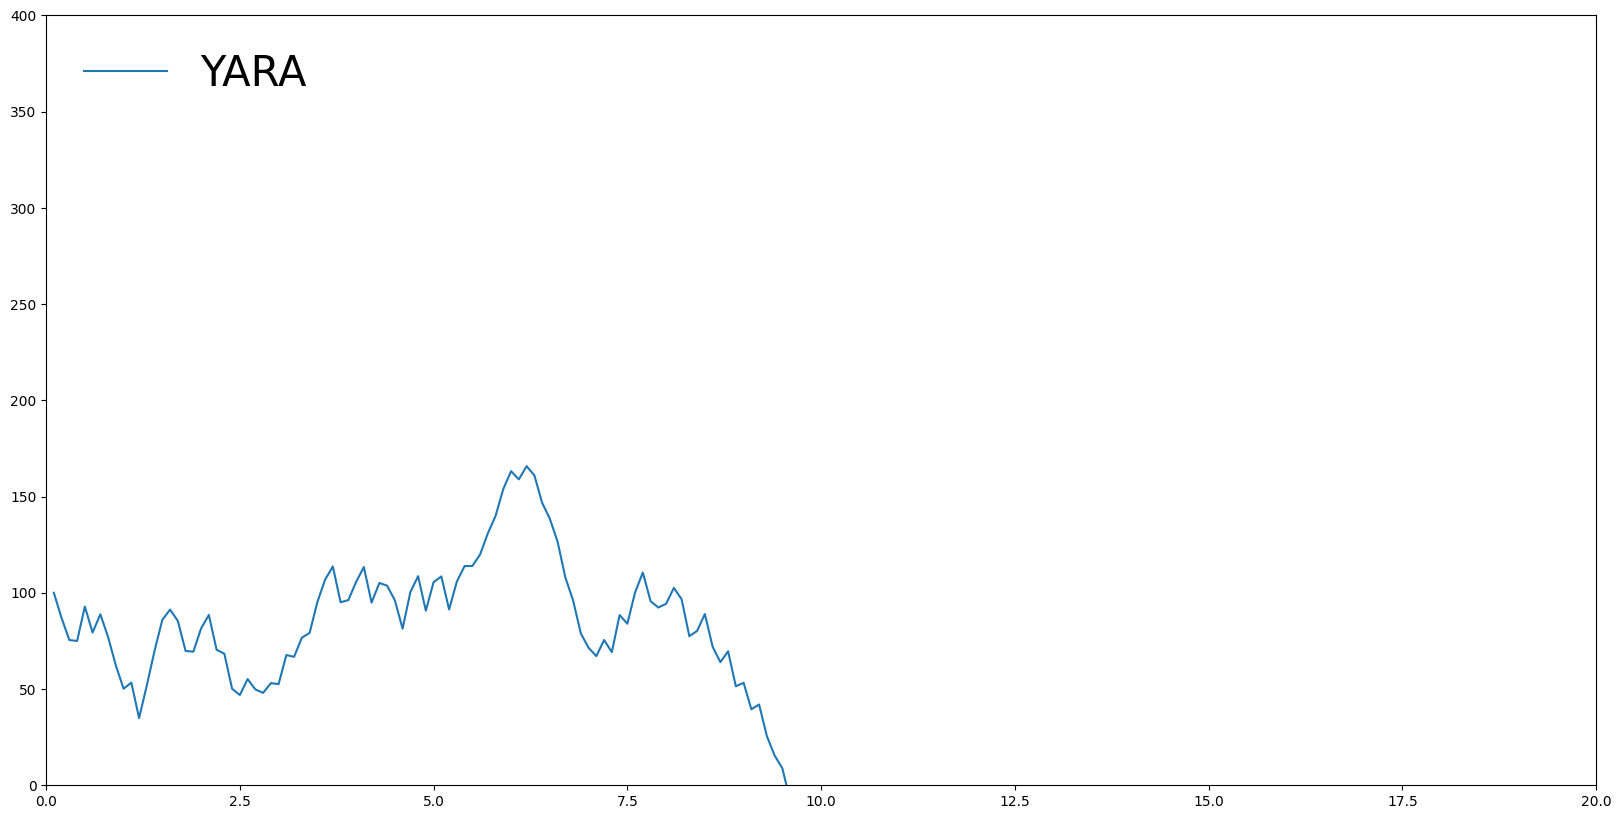

In [5]:
x, y, dy = 0, 100, 0

ypath = []
xpath = []

while x < 25 and y >=0:
    x += 0.1
    y += dy
    dy = 40 * (np.random.rand() - 0.5)

    xpath.append(x)
    ypath.append(y)
    
    # Ved å plassere plot-funksjonen inne i løkka, sørger vi for at den plottes ved hver iterasjon
    ax.plot(xpath, ypath, label='YARA')
    ax.legend(loc='upper left', frameon=False, fontsize=30)
    
    # Jupyter viser som standard bare siste utsagn, så vi må legge til dette
    # for å plotte på hver iterasjon
    display(fig)
    
    # Sørger for at plottet og utdataene blir slettet hver gang:
    ax.cla()
    ax.set_ylim([0, 400])
    ax.set_xlim([0, 20])
    clear_output(wait=True)

# Legge til litt effekter 🔄

Det er også gøy med litt effekter når vi skal formidle noe, bare det ikke blir så mye at det drar oppmerksomheten bort fra det vi skal formidle. I denne simuleringen er det veldig fristende å lage en lite rød prikk som "leder" aksjekursen videre. Vi skal også legge til en liten tekst som forteller hva aksjekursen er:

#### Eksempel 6:

In [6]:
x, y, dy= 0, 100, 0

ypath=[]
xpath=[]

while x < 25 and y >= 0:
    x += 0.1
    y += dy
    dy = 40*(np.random.rand()-0.5)


    xpath.append(x)
    ypath.append(y)
    
    # Ved å plassere plot-funksjonen inne i løkka, sørger vi for at den plottes ved hver iterasjon
    ax.plot(xpath,ypath,label='YARA')
    ax.legend(loc='upper left',frameon=False,fontsize=30)
    
    # Lager den rød prikken
    c=Ellipse((x, y), 0.25,5, color='r')
    ax.add_patch(c)
    
    # Lager teksten ved siden av den røde prikken
    ax.text(x+0.1,y+3,f'NOK {np.round(y,1)}')
    
    # Jupyter viser kun siste utsagn som standard, så vi må legge til dette
    # for å plotte ved hver iterasjon
    display(fig)
    
    # Sørger for at plottet og utdataene blir slettet hver gang, og det ser ut som plottet oppdateres
    ax.cla()
    ax.set_ylim([0,800])
    ax.set_xlim([0,25])
    clear_output(wait = True)

KeyboardInterrupt: 

# 🔢 Numerisk optimering  

Tidligere har vi funnet maksverdien av funksjoner ved å bruke **Sympy** til å derivere en funksjon, sette den lik null og løse for $x$.  

Men hva om det er vanskelig å finne den optimale løsningen analytisk? (Noe det ofte kan være!) 

I slike tilfeller kan vi bruke **numerisk optimering**, der vi evaluerer objektfunksjonen (det vi ønsker å maksimere) for mange ulike verdier og velger den beste.  

### Hva gjør vi i dette eksemplet?  
Vi ser på en bedrift som selger $Q$ enheter av en vare til pris $p$, med en kostnad per enhet $C$.  
Bedriftens **fortjeneste** (profit) er gitt ved:  

$$p \cdot Q - C \cdot Q$$

Vi bruker numeriske metoder for å finne verdien av $Q$ som maksimerer fortjenesten.  

Videre, antar vi at etterspørselfunksjonen (som bestemmer $Q$) er definert slik:

$$100 - p$$

Selv om vi i dette tilfellet enkelt kan finne maksimum analytisk med **Sympy**, kan vi bruke dette eksempelet for å sjekke at den numeriske løsningen er korrekt.  

Numerisk optimering er nyttig når:
- Funksjonen er **komplisert** og vanskelig å derivere.
- Vi har **diskrete verdier** der derivasjon ikke er praktisk.
- Vi ønsker å **visualisere hvordan løsningen varierer** over et bredt spekter av verdier.

La oss nå implementere dette i Python i eksemplene under!

### Eksempel 7:

In [19]:
# Definerer fortjenestefunksjonen, som avhenger av en etterspørsel.
def profit(p, C):
    """Beregner profitt gitt pris p og kostnad per enhet C."""
    Q = demand(p)
    return p * Q - C * Q

Q bestemmes av en etterspørselfunksjon.

#### Eksempel 8

In [8]:
# Definerer etterspørselfunksjonen
def demand(p):
    """Returnerer antall enheter solgt gitt en pris p."""
    return 100 - p

Vi kan nå finne optimum numerisk, altså tallverdiene (optimal pris og hva maksimal profitt er ved denne optimale prisen.)

#### Eksempel 9:

In [9]:
import numpy as np

def find_optimal_price(start, end, C):
    """Finner optimal pris i prisintervallet (start, end)"""
    max_profit = float('-inf')
    optimal_price = None
    n_samples = 1000
    
    # Itererer over pris-intervallet (start, end)
    for p in np.linspace(start, end, n_samples):
        current_profit = profit(p, C)
        if current_profit > max_profit:
            # Hvis 'profit' går over 'current profit', så lagrer vi den nye 'profit' og pris
            max_profit = current_profit
            optimal_price = p

    return optimal_price, max_profit


cost = 5
start_price = 0
end_price = 100

optimal_price, max_profit = find_optimal_price(start_price, end_price, cost)

print(f"Optimal pris: {round(optimal_price, 2)} kr")
print(f"Maksimal profitt ved optimal pris: {round(max_profit, 2)} kr")

Optimal pris: 52.45 kr
Maksimal profitt ved optimal pris: 2256.25 kr


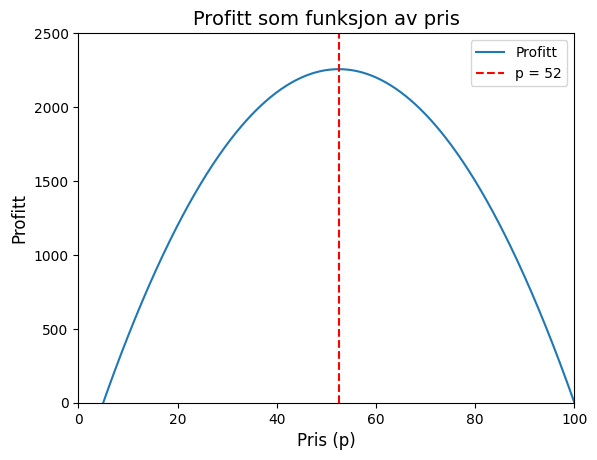

In [10]:
### Vi visualiserer profit funksjonen over - for å se om resultatet virker rimelig ###
import matplotlib.pyplot as plt
import numpy as np


# Kostnad per enhet ost, start_price og end_price (du kan justere denne verdien)
cost = 5
start_price = 0
end_price = 100

# Lag en array med pris (p) verdier fra 0 til 100
p_values = np.linspace(start_price, end_price, 500)

# Beregn profitt for hver pris-verdi (p)
profit_values = [profit(p, cost) for p in p_values]

# Plotter profittfunksjonen
plt.plot(p_values, profit_values, label="Profitt")
plt.title("Profitt som funksjon av pris", fontsize=14)
plt.xlabel("Pris (p)", fontsize=12)
plt.ylabel("Profitt", fontsize=12)
plt.ylim(0, 2500)  # Setter y-aksen fra 0 til 3000
plt.xlim(0, 100)   # Setter x-aksen fra 0 til 150
plt.axvline(x=optimal_price, color='red', linestyle='--', label=f'p = {round(optimal_price)}')
plt.legend()
plt.show()

Det ser ut som at optimal prisen på drøye $52$ passer godt til å være optimalpris!

Vi kan verifisere dette enda en gang, ved hjelp av ```SymPy```.

#### Eksempel 10:

In [11]:
import sympy as sp

# Definerer variabelen p (pris)
p = sp.Symbol('p')

# Kostnad C er satt til 30
C = 5

# Etterspørselsfunksjon
def demand(p):
    return 100 - p

def profit(p, C):
    """Beregner profitt gitt pris p og kostnad per enhet C."""
    Q = demand(p)
    return p * Q - C * Q

# Deriverer profittfunksjonen med hensyn til p
profit_derivative = sp.diff(profit(p, C), p)

# Finn den optimale p-verdien ved å løse ligningen profit_derivative = 0
optimal_p = sp.solve(profit_derivative, p)

# Viser den optimale prisen
optimal_p_value = round(optimal_p[0], 2)
optimal_p_value

52.50

Her ser vi at SymPy gir at svaret er $52.5$ kr, mens simulering gjorde at vi fikk $52.45 \approx 52.5$ kr. Som viser styrken til begge metodene.

# Monte Carlo-simulering 🖥️ 🎲 📊

Monte Carlo-simulering er en metode for å estimere resultater ved hjelp av tilfeldige prøver.  
Denne teknikken er spesielt nyttig når det er **usikkerhet** i dataene eller **mange mulige utfall**.  

### 🔹 Hvorfor bruke Monte Carlo-simulering?  
- Mange økonomiske prosesser, som **investeringer og lønnsvekst**, er usikre.  
- Deterministiske modeller fanger **ikke opp tilfeldigheter**, noe Monte Carlo-simulering gjør.  
- Vi kan bruke denne teknikken for å lage **sannsynlighetsfordelinger** og forutsi mulige utfall.  

I dette eksempelet ser vi på **inntektsutvikling** over tid, hvor inntekten hvert år avhenger av fjoråret.  
- **Vi starter med en gitt inntekt** og antar en årlig vekstrate (én prosent).  
- **Hvert år legges en tilfeldig variasjon til**, som representerer usikkerhet.  
- Vi kjører simuleringen mange ganger for å se hvordan inntekten utvikler seg over tid.  

Vi starter med å definere en funksjon som beregner neste års inntekt, basert på fjoråret og et tilfeldig bidrag: 

#### Eksempel 11

In [12]:
import numpy as np

def calc_income(last_year_income, growth_rate, volatility):
    # Tilfeldig vekst basert på normalfordeling
    random_growth = np.random.normal(0, volatility)
    
    # Total vekst er forventet vekst pluss tilfeldig vekst
    growth =  growth_rate + random_growth
    
    # Beregn årets inntekt
    income = round(last_year_income * (1 + growth))
    
    return income

# Her antar vi at fjorårets lønn er 600.000kr, med 5% forventet inntektsøkning og 2% usikkerhet

print(f'Hvis fjorårets lønn er 600.000 kr, så er årets lønn {calc_income(600000, 0.05, 0.02)}, hvis vi har 5% forventet lønnsøkning og 2% usikkerhet.')

Hvis fjorårets lønn er 600.000 kr, så er årets lønn 636247, hvis vi har 5% forventet lønnsøkning og 2% usikkerhet.


#### **Så lager vi en funksjon som lager en "inntektssti" (income path) for et gitt antall års inntekt. Dette kalles en "sti"/"path" fordi dagens inntekt er avhengig av gårsdagen. Dagens situasjon er altså avhengig av hvilken sti inntekten har fulgt i alle tidligere år.**

#### Eksempel 12

In [13]:
def income_path(years, initial_income, growth_rate, volatility):
    
    incomes = [initial_income]
    
    # Simulerer en "inntektssti" over et gitt antall år
    for i in range(years):

        # Beregner inntekt for året
        income = calc_income(incomes[-1], growth_rate, volatility)

        # Legger til inntekten i listen
        incomes.append(income)
        
    return incomes

#regner ut for fem år frem i tid:
income_path(5,600000, 0.05, 0.02)

[600000, 649976, 681904, 705020, 732480, 776129]

#### **Vi kan nå lage en funksjon som simulerer et gitt antall inntektsstier gitt ved `num_simulations`:**

#### Eksempel 13:

In [14]:
import pandas as pd

def simulate_income(years, initial_income, growth_rate, volatility, num_simulations):
    """Returnerer en 2D-array med simulerte inntekter for hvert år."""
    # Starter med en tom liste, hvor vi skal fylle på med tall
    all_incomes = []
    for _ in range(num_simulations):
        # Legger til "the path" til variabelesn 'all_incomes'
        incomes = income_path(years, initial_income, growth_rate, volatility)
        all_incomes.append(incomes)

    # Setter inn i pandas DataFrame for å få en visuelt, finere tabell
    return np.array(all_incomes)

# Simulerer 5 forskjellige inntektsbaner over 5 år
pd.DataFrame(simulate_income(5, 600000, 0.05, 0.02, 5))

,0,1,2,3,4,5
0,600000,639012,662817,698854,723306,781880
1,600000,641676,675236,695176,739695,774867
2,600000,631258,665001,699709,747058,807029
3,600000,620496,650218,678557,696956,748948
4,600000,637744,683133,726643,768397,806878


#### **Vi kan nå plotte fordelingen, for å få et inntrykk av fordelingen til inntekten i avslutningsåret:**

#### Eksempel 14:

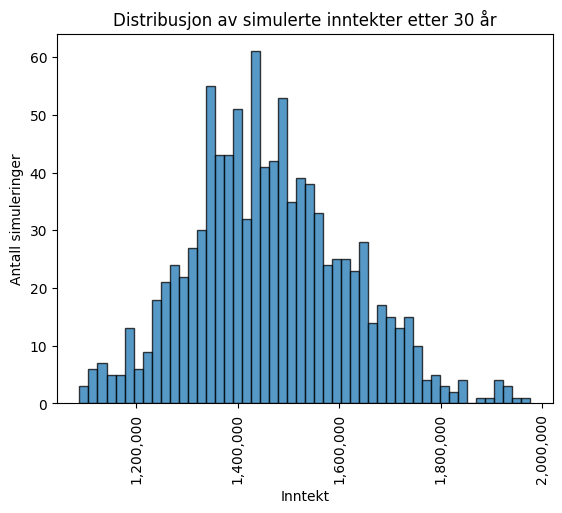

In [15]:
import matplotlib.pyplot as plt

# Parametere
initial_income = 600000   # Start-inntekt
growth_rate = 0.03        # Forventet lønnsvekst (prosent)
volatility = 0.02         # Volatilitet (usikkerhet)
years = 30                # Antall år
num_simulations = 1000    # Antall simuleringer

simulated_incomes = simulate_income(years, initial_income, growth_rate, volatility, num_simulations)

# plotting the final income
final_year_incomes = simulated_incomes[:, -1]

plt.hist(final_year_incomes, bins=50, edgecolor='black', alpha=0.75)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.title("Distribusjon av simulerte inntekter etter 30 år")
plt.xlabel("Inntekt")
plt.ylabel("Antall simuleringer")
plt.show()

### **Ekstra visualisering: Plotte flere inntektsstier**
Eksempel 14 (rett over), viser distribusjon (fordelingen) av simulerte inntekter etter $30$ år - hvor startinntekten var på $600 \; 000$ kr.

For å vise hvordan ulike simuleringer utvikler seg over tid, kan vi legge til en graf som viser hvordan inntektsbanene utviklet seg.

Eksempel 15:

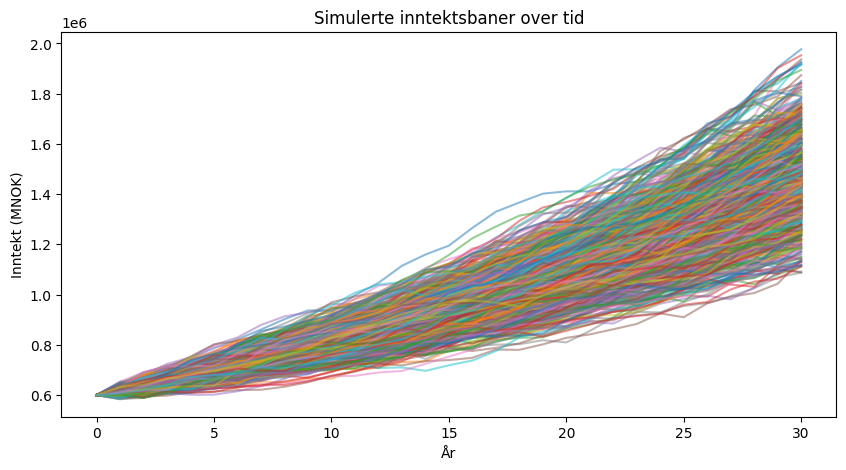

In [16]:
plt.figure(figsize=(10, 5))

for i in range(1000):  # Plotter de 1000 inntektsstiene fra over
    plt.plot(simulated_incomes[i], alpha=0.5)

plt.title("Simulerte inntektsbaner over tid")
plt.xlabel("År")
plt.ylabel("Inntekt (MNOK)")
plt.show()

## **Ekstra-Ekstra IKKE PENSUM, MEN KJEKT Å VITE OM**
Vi kan lage flotte plots, ved hjelp av noe som heter Plotly. Se kodeblokken under, for eksempel:

In [20]:
import plotly.graph_objects as go

# Assuming simulated_incomes is already defined

fig = go.Figure()

# Lager en loop som går igjennom de 10 første simulerte inntekts-path'ene
for i in range(10):
    fig.add_trace(go.Scatter(
        x=list(range(2005, 2023)),  # Årstall fra 2005 til 2022
        y=simulated_incomes[i],
        mode='lines',
        line=dict(width=2),  # Customize line width if needed
        opacity=0.5,  # Set the opacity for the lines
        name=f"Inntektssti nr. {i+1}" if i == 0 else None  # Only label the first line
    ))

# Oppdater layout
fig.update_layout(
    title="Simulerte inntektsbaner over tid",
    xaxis_title="År",
    yaxis_title="Inntekt (MNOK)",
    showlegend=False
)

# Vis figuren
fig.show()

# Oppgaver

### Oppgave 1 - 📈 Simulering av aksjekurs  
En aksjekurs beveger seg tilfeldig over tid. Vi antar at aksjen starter på **100 kroner** og endrer seg tilfeldig for hver tidsperiode.  

- **Lag en simulering av aksjekursen over 100 dager**  
- Hver dag endrer aksjekursen seg med en tilfeldig verdi mellom -3% og +3%  
- Plott kursutviklingen  

*Tips: Bruk en for-løkke og lagre verdiene i en liste!* 

Bruk denne: `np.random.uniform(-0.03, 0.03)` 

Den gir tilfeldig tall mellom $-0.03$ og $0.03$.

Koden kan gjerne starte noe ala dette:

```python
# Parametere
days = 100
price = 100
prices = [price]

# Fortsett koden under - simulering og plotting
```


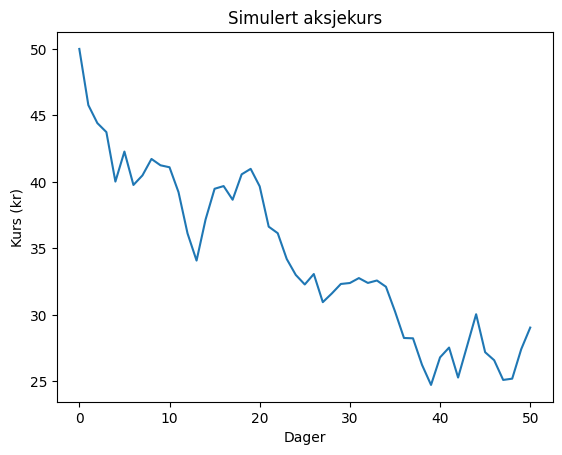

In [2]:
import numpy as np
import matplotlib.pyplot as plt

days = 50 # Parametere
price = 50
prices = [price]
x,y = -0.1, 0.1

for dog in range(days): # Simulerer aksjekursen over tid
    endring = np.random.uniform(x, y)  # Tilfeldig endring mellom x og y
    price = price * (1 + endring)
    prices.append(price) # Legger til hva som skal være her
    
# Plotter aksjekursen
days_liste = list(range(days + 1))  # +1  for å få med den siste
plt.plot(days_liste, prices)
plt.title("Simulert aksjekurs")
plt.xlabel("Dager")
plt.ylabel("Kurs (kr)")
plt.show()

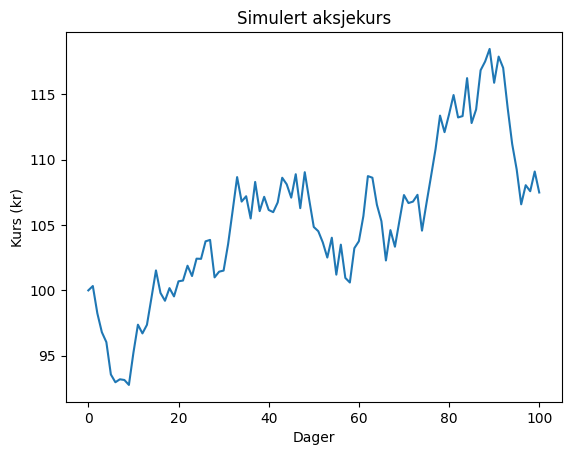

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parametere
days = 100
price = 100
prices = [price]

# Simulerer aksjekursen over tid
for _ in range(days):
    price *= 1 + np.random.uniform(-0.03, 0.03)  # Tilfeldig endring mellom -3% og +3%
    prices.append(price)

# Plotter aksjekursen
plt.plot(prices)
plt.title("Simulert aksjekurs")
plt.xlabel("Dager")
plt.ylabel("Kurs (kr)")
plt.show()

In [4]:
prices

[100,
 100.33475774367784,
 98.2475134539049,
 96.80503533962404,
 96.04217291245949,
 93.56925404061845,
 92.97441142767772,
 93.2008081400488,
 93.14656857214408,
 92.7695925655548,
 95.22822563083238,
 97.3770094652943,
 96.71048095749305,
 97.36798857033827,
 99.42832859079289,
 101.52941752498157,
 99.8080366437896,
 99.20690185961942,
 100.17329030237362,
 99.54035657290488,
 100.69523010409726,
 100.75449686996329,
 101.88697091444185,
 101.09814263096443,
 102.42739411301443,
 102.41349383434384,
 103.75181497526188,
 103.86305111440925,
 100.99581909166395,
 101.43139073574778,
 101.51619755878946,
 103.5416741865807,
 106.07827259660459,
 108.66466093248037,
 106.79401623312918,
 107.20201095056817,
 105.50262964397078,
 108.2948851633671,
 106.06306920211313,
 107.15806582806943,
 106.15311853439367,
 105.98550017614596,
 106.72981702274726,
 108.61733866749431,
 108.11317432036255,
 107.09472530362262,
 108.88572845869808,
 106.28989073082471,
 109.04036951739077,
 106.9096

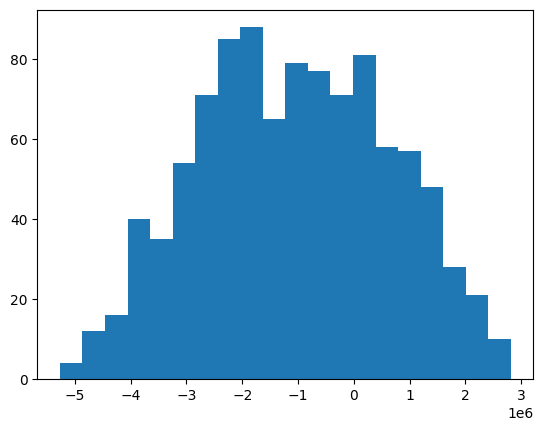

In [18]:
profittliste = []

for hund in range(1000):
    Q = np.random.randint(500, 650)  # Antall solgte enheter
    p = np.random.uniform(90, 5000)  # Pris per enhet
    C = np.random.uniform(50, 9000)  # Kostnad per enhet
    
    profitt = Q * p - Q * C  # Overskuddsformel
    profittliste.append(profitt)

plt.hist(profittliste, bins=20);

### Oppgave 2 - 🏢 Simulering av bedriftens overskudd 
En bedrift selger **Q** produkter til pris **p**, og produksjonskostnaden per enhet er **C**.  
Overskuddet beregnes som:  

$\text{Overskudd} = Q \cdot p - Q \cdot C$

**Lag en simulering der**:  
- **Q** varierer mellom 900 og 1100  
- **p** varierer mellom 90 og 110  
- **C** varierer mellom 50 og 70  

* Kjør simuleringen **1000 ganger**  
* Plott histogram av overskuddet  

*Tips: Bruk numpy for å generere tilfeldige verdier!*  

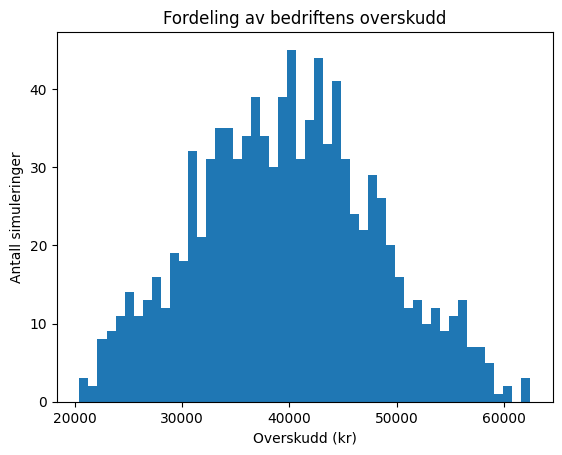

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulering av bedriftens overskudd
num_simulations = 1000
profits = []

for _ in range(num_simulations):
    Q = np.random.randint(900, 1100)  # Antall solgte enheter
    p = np.random.uniform(90, 110)  # Pris per enhet
    C = np.random.uniform(50, 70)  # Kostnad per enhet
    
    profit = Q * p - Q * C  # Overskuddsformel
    profits.append(profit)

# Plotter histogram
plt.hist(profits, bins=50)
plt.title("Fordeling av bedriftens overskudd")
plt.xlabel("Overskudd (kr)")
plt.ylabel("Antall simuleringer")
plt.show()

### Oppgave 3 - 💰 Simulering av lånekostnader  
Du tar opp et boliglån på **2 000 000 kr**. Renten er i utgangspunktet **3%**, men den varierer tilfeldig mellom **2% og 5%** hvert år.  

- **Simuler utviklingen i lånekostnader over 30 år**  
- Beregn den totale rentekostnaden etter 30 år  
- Kjør simuleringen **500 ganger**, og plott fordelingen av totale rentekostnader

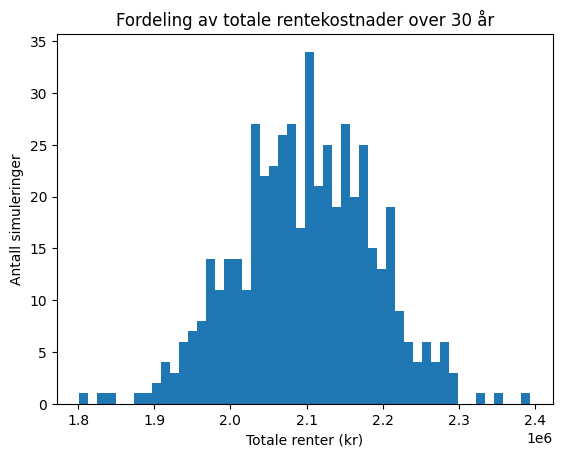

In [3]:
import numpy as np 

# Funksjon for å simulere renteutvikling
def simulate_loan(years=30, principal=2_000_000, base_rate=0.03, min_rate=0.02, max_rate=0.05):
    total_interest = 0
    for _ in range(years):
        rate = np.random.uniform(min_rate, max_rate)
        interest = principal * rate
        total_interest += interest
    return total_interest

# Kjører simuleringen 500 ganger
loan_costs = [simulate_loan() for _ in range(500)]

# Plotter histogram over totale rentekostnader
plt.hist(loan_costs, bins=50)
plt.title("Fordeling av totale rentekostnader over 30 år")
plt.xlabel("Totale renter (kr)")
plt.ylabel("Antall simuleringer")
plt.show()

In [22]:
loan_costs

[2040167.7686414858,
 2060257.4483721796,
 2017701.5868212036,
 2120130.8486199463,
 2083907.7841752314,
 2029032.9758539032,
 1948972.4657487446,
 2251412.6292613824,
 2123528.731587053,
 1928945.916283545,
 2152371.859656531,
 2068163.3917723862,
 1991073.8919521878,
 2088279.07900689,
 2193448.5564466245,
 2178875.1038094666,
 2249452.551196668,
 2163575.607132641,
 1957557.4822715954,
 2201804.9082292747,
 2164289.1562040043,
 2083736.480180442,
 2110844.499585816,
 2065548.921394738,
 1969285.4428476386,
 2103394.8087374815,
 1903329.456676612,
 2035318.1508076617,
 2197501.131424448,
 2103536.301448471,
 1968892.1997927427,
 2220109.0079313777,
 2082691.0597647477,
 2061885.551525239,
 2142439.0374858244,
 1847197.4251691904,
 2031023.6834775312,
 2065120.423878317,
 2109285.1854839115,
 2102788.860411584,
 2048546.2889607155,
 2168930.1535458774,
 2109569.3906586356,
 2091632.7199349168,
 2180755.457244966,
 2030121.637421969,
 2068275.5084858788,
 1943129.0041813964,
 2175887.8

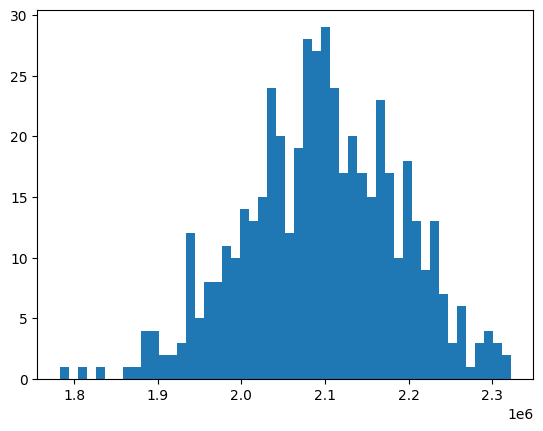

In [ ]:
from matplotlib import pyplot as plt 

years = 30
principal = 2000000
min_rate = 0.02
max_rate = 0.05


def simulate_loan():
    total_interest = 0
    for alle_år in range(years):
        rate = np.random.uniform(min_rate, max_rate)
        interest = principal * rate
        total_interest += interest
    return total_interest


def simuler_uten_list_comp(n):
    results = []
    for antall_simuleringer in range(n):
        results.append(simulate_loan())
    return results

lanekostnader = simuler_uten_list_comp(n=500)


plt.hist(lanekostnader, bins=50);


In [20]:
simuler_uten_list_comp(2)

[2087954.3419491425, 2286289.447780201]

### Oppgave 4 - 📦 Simulering av lagerstyring og etterspørsel  
Et selskap håndterer en vare med en ukentlig etterspørsel som varierer mellom **80 og 120 enheter**.  
De bestiller varer hver uke basert på en prognose, men **det er alltid en usikkerhet på ±10% i etterspørselen**.  

- **Simuler lagerbeholdning over 52 uker**  
- Start med et lager på **500 enheter**  
- Hvis lageret går under **100 enheter**, bestilles **200 nye enheter**  
- Plott utviklingen i lagerbeholdning over tid

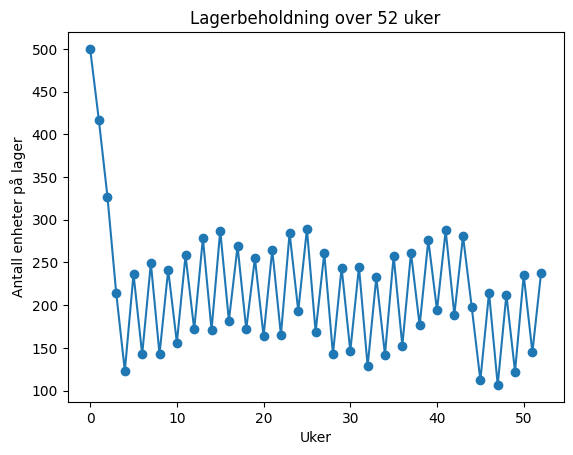

In [21]:
# Lagerstyring simulering
weeks = 52
stock = 500
stock_levels = [stock]

for uke in range(weeks):
    demand = np.random.randint(80, 120)  # Ukentlig etterspørsel
    demand += demand * np.random.uniform(-0.1, 0.1)  # Usikkerhet på ±10%
    
    stock -= demand  # Trekk fra etterspørsel
    
    if stock < 100:  # Hvis lageret blir for lavt, bestill mer
        stock += 200
    
    stock_levels.append(stock)

# Plot lagerbeholdning over tid
plt.plot(stock_levels, marker='o')
plt.title("Lagerbeholdning over 52 uker")
plt.xlabel("Uker")
plt.ylabel("Antall enheter på lager")
plt.show()

# Oppgave 5 - Simuleringer 💰🎲💰
Du er på tur med vennegjengen din på casino i Monaco, og spiller et (fiktivt) terningspill. 

Du vet at en vanlig terning følger en $\textit{diskret uniform fordeling}$, hvor det er like stor sannsynlighet for hvert $\textit{utfall}$ (altså om terningen viser $1, \; 2, \; 3, \; 4, \; 5$ eller $6$).

I statistikk, snakker vi ofte om $\textit{forventningsverdi}$ (skrives $E[X]$), som sier noe om hva vi forventer en tilfeldig variabel $X$ vil være. For diskret problemer er det definert som 
$$E[X] = \sum_{i=1}^{n}x_i \cdot P(X=x_i)$$

hvor $x_i$ er verdien av terningen, og $P(X=x_i)$ er sannsynligheten for å få verdien $x_i$ på et kast. Vi vet at $n=6$, ettersom det er $6$ ulike utfall av en terning. Da kan vi skrive det ut slik:
$$E[X] = 1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + \cdots + 6 \cdot \frac{1}{6}$$

regner vi ut dette ser vi at vi får $E[X] =3.5$. Dermed er forventningsverdien til en terning lik $3.5$.

## Case
I dette fiktive terningsspillet i Monaco skal man trille to terninger, samtidig. Man vinner spillet hvis summen av de to terningene er *over eller lik* $9$. 
Du kommer på at du kan simulere utfall ved hjelp av Python og Numpy.

## Oppgave 5.1
Bruk simulering, til å finne ut sannsynligheten for at du triller to treninger med sum $\textbf{over eller lik}$ $9$. 
- Visualiser utfallene ved bruk av et histogram.
- Antall simuleringer skal dere velge selv, men kommenter hvorfor dere velger som dere gjør.
- Under er et lite kodehint for hva dere kan ta i bruk.
```python
        # Mulige bibliotek for oppgaven.
        import numpy as np
        import matplotlib.pyplot as plt
        import random

        # Du kan få bruk for funksjonen (hvor argumentene må spesifiseres i henhold til oppgaven). Hvor low = inkludert, high = ekskludert.
        np.random.randint(low, high=None, size=None, dtype=int)
```

## Oppgave 5.2
Finn ut hvor mange kast av to terninger må du ta ($n$) for at sannsynligheten for å få en sum over eller lik $9$ minst én gang er over $90$%. 

Hint - formelen for å finne sannsynligheten for at summen er over eller lik 9, minst én gang er gitt som følgende:
$$P(\text{summen} \geq 9 \text{ minst én gang}) = 1 - \left(P(\text{summen} < 9)\right)^n$$

hvor $P\left(\text{summen} < 9\right)$ kan finnes fra simuleringen over.

Bruk ```sympy``` for å løse dette problemet, og si hvor mange ganger ($n$) vi må trille terningen.

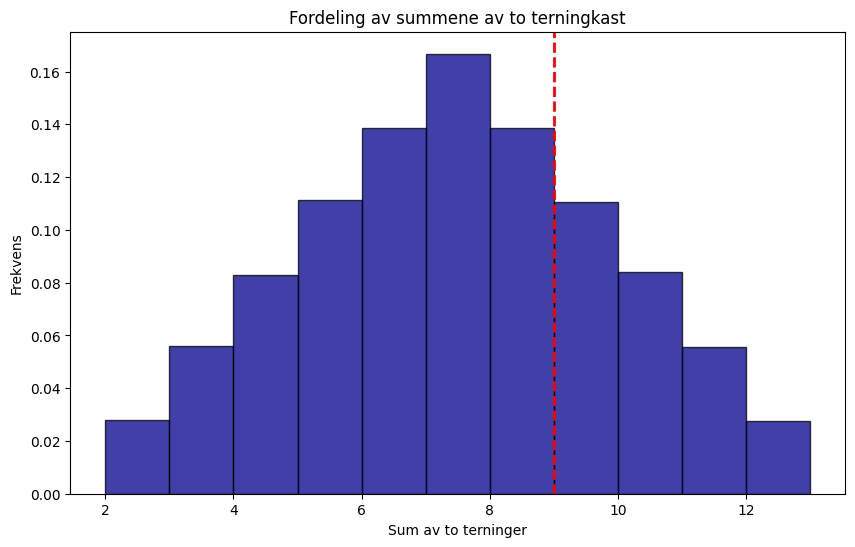

Sannsynligheten for at summen av to terninger er over eller lik 9: 0.2779


In [ ]:
# Oppgave 5.1
import numpy as np
import matplotlib.pyplot as plt

# Antall simuleringer
sims = 1000000

# Simulere kast med to terninger
terning1 = np.random.randint(1, 6+1, sims)
terning2 = np.random.randint(1, 6+1, sims)

# Beregn summen av de to terningene for hver simulering
sum_terninger = terning1 + terning2

# Beregn sannsynligheten for at summen er over 9
antall_vinn = np.sum(sum_terninger >= 9)
sannsynlighet_vinn = antall_vinn / sims

# Visualiser resultatene
plt.figure(figsize=(10, 6))
plt.hist(sum_terninger, bins=range(2, 14), density=True, alpha=0.75, color='darkblue', edgecolor='black')
plt.axvline(9, color='r', linestyle='dashed', linewidth=2)
plt.title('Fordeling av summene av to terningkast')
plt.xlabel('Sum av to terninger')
plt.ylabel('Frekvens')
plt.grid(False)
plt.show()

# Print resultatene
print(f"Sannsynligheten for at summen av to terninger er over eller lik 9: {sannsynlighet_vinn:.4f}")

In [ ]:
# Oppgave 5.2
import sympy as sp
import numpy as np
import math

# Definer variabelen som representerer summen av terningkastene
n = sp.symbols('n')

# Sannsynligheten for at summen er under 9 (fra simulering i oppgave 2.1):
P_under_9 = 1 - sannsynlighet_vinn

# Vi ønsker å løse følgende likning for n:
# 1 - (P_under_9)^n = 0.9
likning = 1 - (P_under_9)**n - 0.9

# Løs likningen for n
løsning = sp.solve(likning, n)

# Vi runder opp svaret, da hvis det er 7,09 --> må det minst være 8 kast for å få 90% eller høyere sannsynlighet. I tillegg, gir ikke 7,09 kast mening og må avrundes.
round_up_answer = math.ceil(løsning[0])

# Printer svaret
print(f"Antall kast n må være minst: {round_up_answer}")

Antall kast n må være minst: 8


##### [< Forrige](6%20-%20pandas%2C%20filtrering%2C%20logikk%20og%20betingelser.ipynb)     |     <span style="color:lightgrey">Neste></span>